# GROUP 10
### - Abhinav Merugu
### - Hamsaraj Tupthi
### - Anchit Raghuwanshi

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sea Level

In [67]:
gsl = pd.read_csv('sealevel_optimised.csv')
gsl = gsl.groupby(['Time'], as_index=False).mean()
gsl['year'] = gsl.Time.round(0)
gsl.info()
print(gsl.head(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             333 non-null    float64
 1   GMSL (monthly)   333 non-null    float64
 2   GMSL (smoothed)  333 non-null    float64
 3   year             333 non-null    float64
dtypes: float64(4)
memory usage: 10.5 KB
        Time  GMSL (monthly)  GMSL (smoothed)    year
0   1993.042           -48.0            -48.0  1993.0
1   1993.125           -50.0            -46.6  1993.0
2   1993.208           -41.6            -46.3  1993.0
3   1993.292           -47.3            -43.8  1993.0
4   1993.375           -42.4            -45.7  1993.0
5   1993.458           -47.4            -44.4  1993.0
6   1993.542           -43.4            -45.8  1994.0
7   1993.625           -46.5            -44.3  1994.0
8   1993.708           -43.1            -45.2  1994.0
9   1993.792           -46.1           

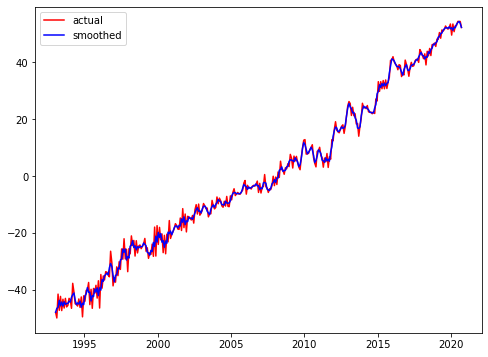

In [68]:
plt.figure(figsize=(8,6))
plt.plot (gsl['Time'], gsl['GMSL (monthly)'], color='red', label='actual')
plt.plot (gsl['Time'], gsl['GMSL (smoothed)'], color='blue', label='smoothed')
plt.legend()

# Global Temp

In [69]:
gt = pd.read_csv('gt_by_month.csv')
print(gt.head(5))
print(gt.describe())

     Year  value (celsius)
0  199301             0.36
1  199302             0.38
2  199303             0.41
3  199304             0.31
4  199305             0.35
                Year  value (celsius)
count     333.000000       333.000000
mean   200644.297297         0.636637
std       802.275389         0.212559
min    199301.000000         0.070000
25%    199912.000000         0.490000
50%    200611.000000         0.630000
75%    201310.000000         0.770000
max    202009.000000         1.310000


# CO2

In [70]:
co2 = pd.read_csv('co2.csv')
co2['year'] = co2['year'].round(0)
co2 = co2[co2.year >= 1993]
co2 = co2[co2.year <= 2020]
co2 = co2.drop(labels=[489, 490, 491], axis=0).reset_index()
co2.info()
print(co2.tail(5))
print(co2.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    333 non-null    int64  
 1   year     333 non-null    int64  
 2   month    333 non-null    int64  
 3   decimal  333 non-null    float64
 4   co2ppm   333 non-null    float64
 5   trend    333 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 15.7 KB
     index  year  month   decimal  co2ppm   trend
328    484  2020      5  2020.375  413.81  412.16
329    485  2020      6  2020.458  412.88  412.30
330    486  2020      7  2020.542  411.17  412.46
331    487  2020      8  2020.625  409.73  412.56
332    488  2020      9  2020.708  410.00  412.84
            index         year       month      decimal      co2ppm  \
count  333.000000   333.000000  333.000000   333.000000  333.000000   
mean   322.000000  2006.378378    6.459459  2006.875000  382.421111   
std     96.273049     8.0233

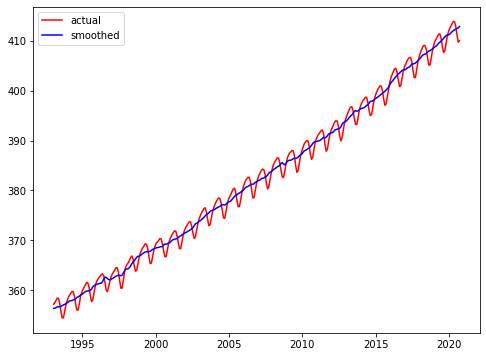

In [71]:
plt.figure(figsize=(8,6))
plt.plot (co2['decimal'], co2['co2ppm'], color='red', label='actual')
plt.plot (co2['decimal'], co2['trend'], color='blue', label='smoothed')
plt.legend()

# Final Frame

In [72]:

rslt = co2
rslt['gmsl'] = gsl['GMSL (smoothed)']
rslt['gt_anomalies'] = gt['value (celsius)']
rslt = rslt.drop(columns=['index'])
# final_frame.head(50)
# print(gsl.shape, co2.shape, rslt.shape)
rslt['year'] = rslt['year'].astype(str)
rslt['month'] = rslt['month'].astype(str)
rslt['date'] = rslt['year'] + '-' + rslt['month']
rslt['date'] = pd.to_datetime(rslt['date'])
rslt['co2ppm'] = rslt['trend']
rslt = rslt.drop(columns=['year', 'month', 'trend', 'decimal'])
rslt.to_csv("global_sea_level_rise.csv")
print(rslt.info())
rslt.head(13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   co2ppm        333 non-null    float64       
 1   gmsl          333 non-null    float64       
 2   gt_anomalies  333 non-null    float64       
 3   date          333 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 10.5 KB
None


,co2ppm,gmsl,gt_anomalies,date
0,356.37,-48.0,0.36,1993-01-01
1,356.40,-46.6,0.38,1993-02-01
2,356.51,-46.3,0.41,1993-03-01
3,356.66,-43.8,0.31,1993-04-01
4,356.72,-45.7,0.35,1993-05-01
5,356.69,-44.4,0.33,1993-06-01
6,356.75,-45.8,0.27,1993-07-01
7,356.91,-44.3,0.22,1993-08-01
8,357.06,-45.2,0.18,1993-09-01
9,357.18,-44.9,0.22,1993-10-01


In [73]:
rslt.tail(13)

,co2ppm,gmsl,gt_anomalies,date
320,410.76,52.2,0.94,2019-09-01
321,411.02,52.0,0.95,2019-10-01
322,411.13,52.5,0.92,2019-11-01
323,411.20,51.8,1.05,2019-12-01
324,411.30,52.2,1.13,2020-01-01
325,411.54,51.3,1.16,2020-02-01
326,411.79,52.4,1.18,2020-03-01
327,412.04,52.2,1.05,2020-04-01
328,412.16,53.4,0.94,2020-05-01
329,412.30,54.0,0.92,2020-06-01


In [74]:
print(rslt.corr().abs().nlargest(10, 'gmsl').index)
rslt.corr()

Index(['gmsl', 'co2ppm', 'gt_anomalies'], dtype='object')


,co2ppm,gmsl,gt_anomalies
co2ppm,1.000000,0.993805,0.798866
gmsl,0.993805,1.000000,0.822395
gt_anomalies,0.798866,0.822395,1.000000
